# Basic Keras Neural Network for Fashion MNIST

## Prerequisites 

- Complete the installation process
- Keras

**VIDEO TUTORIAL:** https://youtu.be/Zq4onPm-h2I

In [1]:
import syft.interfaces.keras as keras
import keras as real_keras
from syft import FloatTensor
from syft.interfaces.keras.models import Sequential
from syft.interfaces.keras.layers import Dense, Dropout
from syft.interfaces.keras.optimizers import SGD

# util to show the digits we are trying to recognize.
def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

C:\Users\ad1026858\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
Using TensorFlow backend.
lol... Just Kidding... Using OpenMined Backend

# Intro
OpenMined has two main interfaces.  One mimics [Keras](https://keras.io/), and the other mimics [Pytorch](https://pytorch.org).

This demo uses the Keras interface to predict fashion products (aka Fashion MNIST).

Keras comes prepackaged with mnist among some [other datasets](https://keras.io/datasets/) that are fun to play with.  Check them out!

In [2]:
from syft.interfaces.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

the data contains 28x28 entries that represent darkness of a pixel

We can use our `show` function to visualize this data

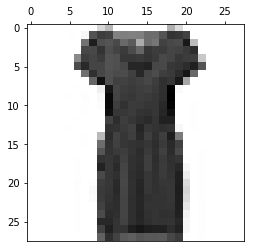

In [3]:
show(x_train[20])

The labels tells us what this actually is

In [4]:
# 0 	T-shirt/top
# 1 	Trouser
# 2 	Pullover
# 3 	Dress
# 4 	Coat
# 5 	Sandal
# 6 	Shirt
# 7 	Sneaker
# 8 	Bag
# 9 	Ankle boot

labels = {0:'T-shirt', 1:'Trouser', 2:'Pullover', 3:'Dress', 4:'Coat', 5:'Sandal', 6:'Shirt', 7:'Sneaker', 8:'Bag', 9:'Ankle Boot'}

l = y_train[20]

print(labels[l])

Dress


We reformat the data a bit to make it easier to work with.

by default, mnist is stored as a number between 0-255 in a 28x28 matrix.  
We reformat this to a 1x784, and divide by 255 to make it a float between 0-1

In [5]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

### Network Architecture
Next, we define our model.  In this example we will be making a simple neural two layer neural network.

This model takes an input of shape 1x784, and the model emits an a 1x10 matrix.  Each number in the matrix represents how confident the model is that the input is that number.  e.g. output[0] == the probability that the input is a 0, output[5] for 5, etc

In [6]:
model = Sequential()

In [7]:
model.add(Dense(16, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

Compile and then train the network!

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=False, validation_data=None)

Number of Batches:468


'0.3814975'

After the model is trained, lets use it to predict a number that it has never looked at before!

In [10]:
(_, _), (test, _) = fashion_mnist.load_data()

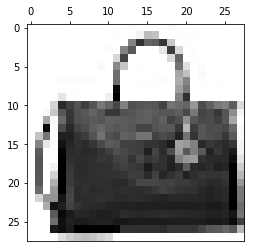

In [11]:
show(test[30])

In [12]:
preds = model.predict(x_test[:128])

In [13]:
preds[30]

array([  9.85589600e-08,   1.32849100e-09,   1.57043900e-05,
         1.64833000e-06,   2.27427600e-05,   3.14340400e-03,
         2.69730300e-05,   3.42605000e-06,   9.96785900e-01,
         1.15603100e-07])

As we can see, it is 99.67% sure that this is a Bag!

# Behind the Scenes

We will talk more about what is going on behind the scenes of this learning in more advanced tutorials.  But for now what we want you to know is that this model contains a bunch of "nodes" that are grouped together in "layers".  Internally, we organize these layers of nodes into things called "Tensors".  The tensors interact with each other as data flows through the network.

![](../resources/images/basic_neural_net.png)